# Predicting Restaurant Food Cost 

Here from the provided dataset we need to predict the Restaurent's cost by using various models

Importing the required libraries as shown below

Data Analysing

Data Visualization

Exploratory data analysis(EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
train=pd.read_excel('train.xlsx')
test=pd.read_excel('test.xlsx')

In [3]:
#train dataset 
train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
#test datset
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [5]:
train["source"] = "train"
test["source"] = "test"

In [6]:
#joining train and test dataset

data=pd.concat([train,test])
data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train
...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,test
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN,test
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,test
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,test


FEATURES:

Size of training set: 12,690 records

Size of test set: 4,231 records


TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

In [7]:
#finding the duplicate values

data.duplicated().sum()

26

In [8]:
#Removing the duplicate values

data=data.drop_duplicates()
data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train
...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,test
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN,test
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,test
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,test


In [9]:
data=data.drop(['source'],axis=1)
data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0


In [10]:
data.shape

(16895, 9)

In [11]:
#it provides the null values and dtypes of datasets

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16895 entries, 0 to 4230
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16895 non-null  object 
 1   RESTAURANT_ID  16895 non-null  int64  
 2   CUISINES       16895 non-null  object 
 3   TIME           16895 non-null  object 
 4   CITY           16748 non-null  object 
 5   LOCALITY       16767 non-null  object 
 6   RATING         16891 non-null  object 
 7   VOTES          15293 non-null  object 
 8   COST           12665 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.3+ MB


In [12]:
#dataset columns

data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [13]:
#datatype of columns
data.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY              object
LOCALITY          object
RATING            object
VOTES             object
COST             float64
dtype: object

In [14]:
data.nunique()

TITLE              123
RESTAURANT_ID    15574
CUISINES          5183
TIME              3295
CITY               450
LOCALITY          1636
RATING              32
VOTES             2075
COST                86
dtype: int64

In [15]:
data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST             4230
dtype: int64

# Data pre-processing


In [16]:
#filling the missing value with missing 

data['CITY'].fillna('missing',inplace=True)

In [17]:
#filling the missing value with missing 

data['LOCALITY'].fillna('missing',inplace=True)

In [18]:
#spliting and considering the required value

data['votes']=data['VOTES'].str.split(' ').str[0]
data=data.drop(['VOTES'],axis=1)
data['votes'].fillna(0,inplace=True)
data['votes']=data['votes'].astype(int)

In [19]:
data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200.0,49
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500.0,30
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800.0,221
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800.0,24
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300.0,165
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,NaN,287
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,NaN,469
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,NaN,53
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,0


In [20]:
#replacing and considering the required value

data['RATING']=data['RATING'].str.replace('NEW','2')
data['RATING']=data['RATING'].str.replace('-','2')

In [21]:
data['RATING']=data['RATING'].astype(float)

In [22]:
data['COST'].max(),data['COST'].min()

(14000.0, 20.0)

In [23]:
data['COST']=data['COST'].fillna(data['COST'].mean())

In [24]:
data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200.00000,49
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500.00000,30
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800.00000,221
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800.00000,24
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300.00000,165
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,655.40079,287
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,655.40079,469
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,655.40079,53
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,2.0,655.40079,0


In [25]:
data.nunique()

TITLE              123
RESTAURANT_ID    15574
CUISINES          5183
TIME              3295
CITY               451
LOCALITY          1637
RATING              30
COST                87
votes             2076
dtype: int64

# Data Visualization

Univariate plot

Chennai             2854
Bangalore           2831
Hyderabad           2458
Mumbai              2301
New Delhi           1750
                    ... 
Begumpet               1
Kerala 690525          1
Kochi Chullickal       1
Kerala 683104          1
Nallala Street         1
Name: CITY, Length: 451, dtype: int64


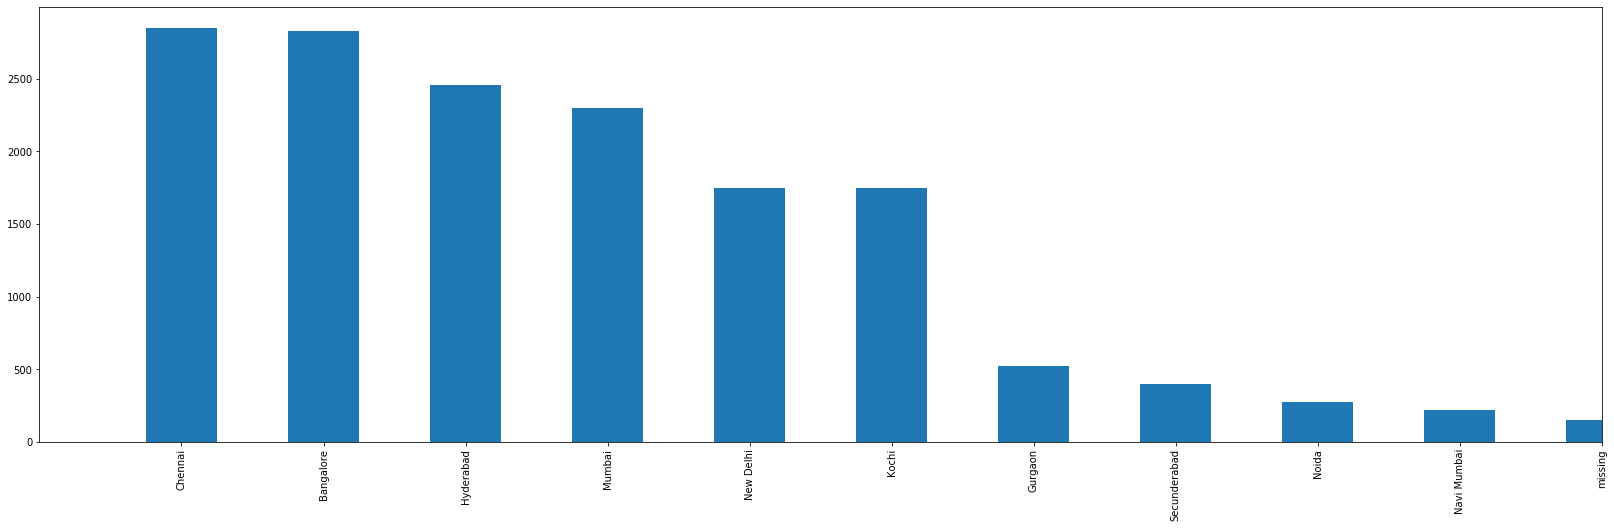

In [26]:
plt.figure(figsize=(28,8))
print(data['CITY'].value_counts())
plt.xticks(rotation=90)
data['CITY'].value_counts().plot.bar().set_xlim(-1,10)
plt.show()

3.9    1638
3.8    1601
2.0    1600
4.0    1493
3.7    1437
3.6    1261
4.1    1214
3.5     985
4.2     967
3.4     776
4.3     740
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      89
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.1       4
2.2       4
Name: RATING, dtype: int64


(0, 15)

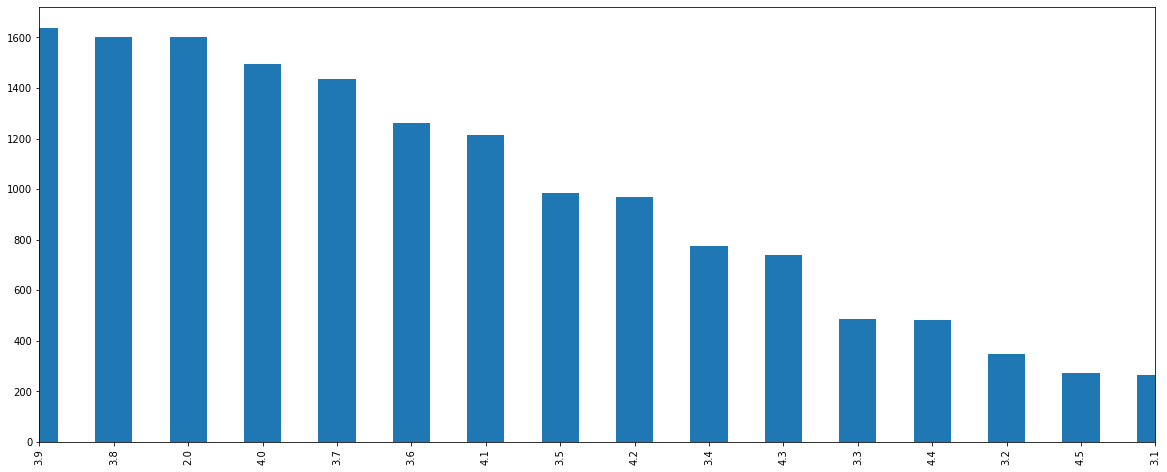

In [27]:
plt.figure(figsize=(20,8))
print(data['RATING'].value_counts())
plt.xticks(rotation=90)
data['RATING'].value_counts().plot.bar().set_xlim(0,15)

655.40079     4230
300.00000     1593
400.00000     1356
500.00000     1297
200.00000     1029
              ... 
3600.00000       1
70.00000         1
7000.00000       1
2900.00000       1
8000.00000       1
Name: COST, Length: 87, dtype: int64


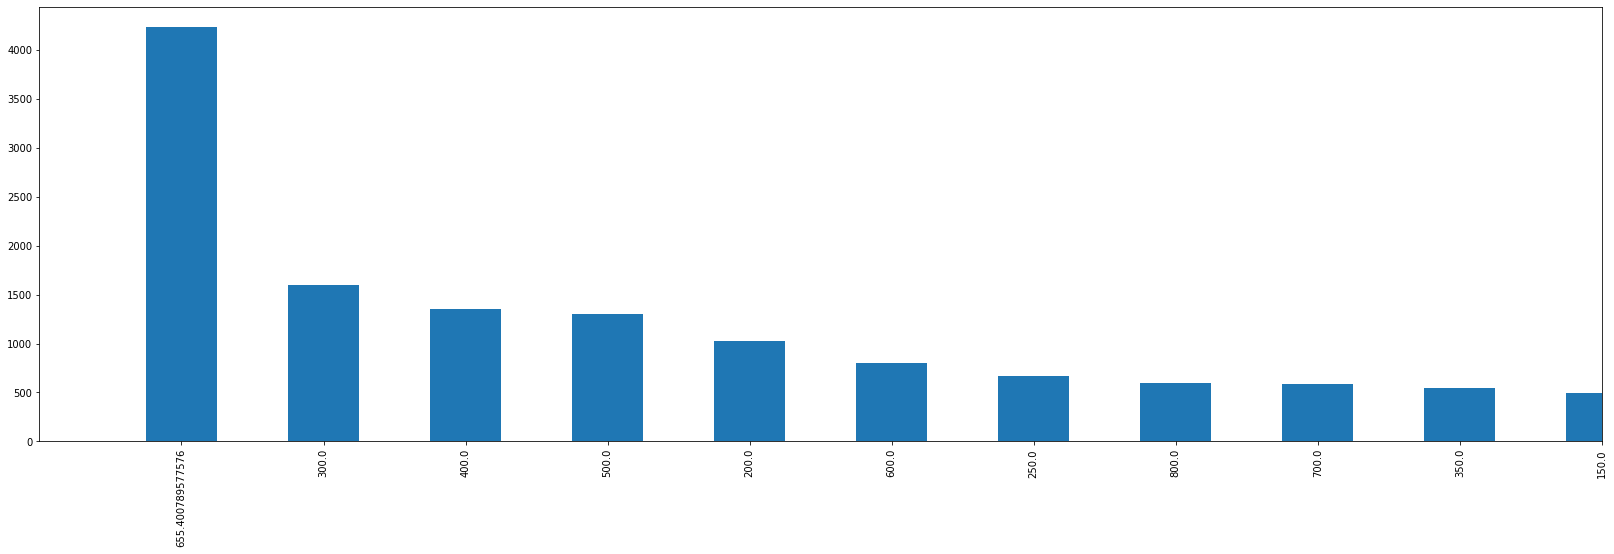

In [28]:
plt.figure(figsize=(28,8))
print(data['COST'].value_counts())
plt.xticks(rotation=90)
data['COST'].value_counts().plot.bar().set_xlim(-1,10)
plt.show()

# Bivariate Plot

(-1, 30)

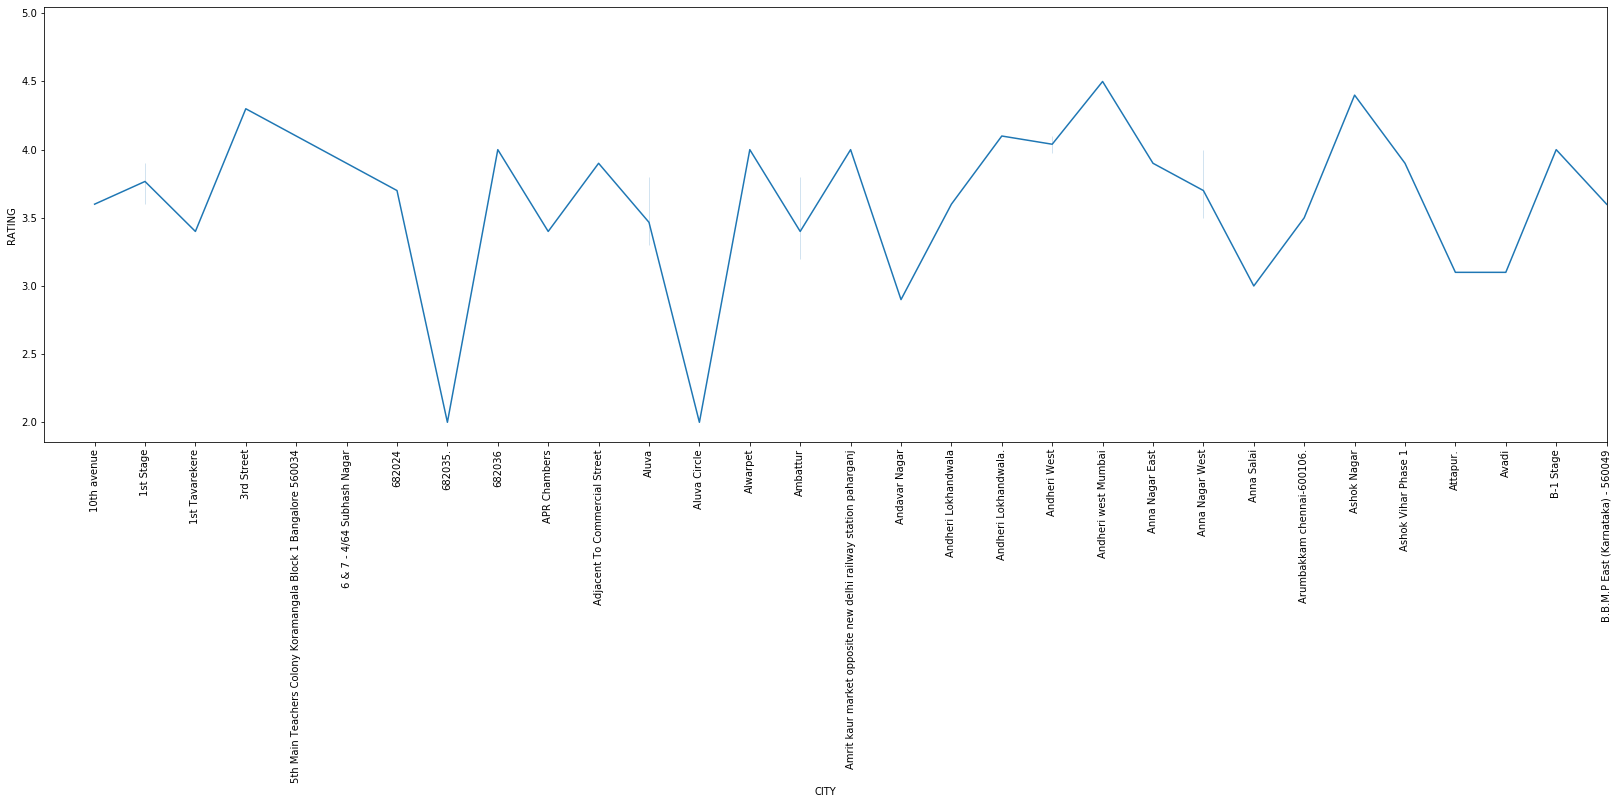

In [29]:
plt.figure(figsize=(28,8))
plt.xticks(rotation=90)
sb.lineplot(x='CITY',y='RATING',data=data).set_xlim(-1,30)

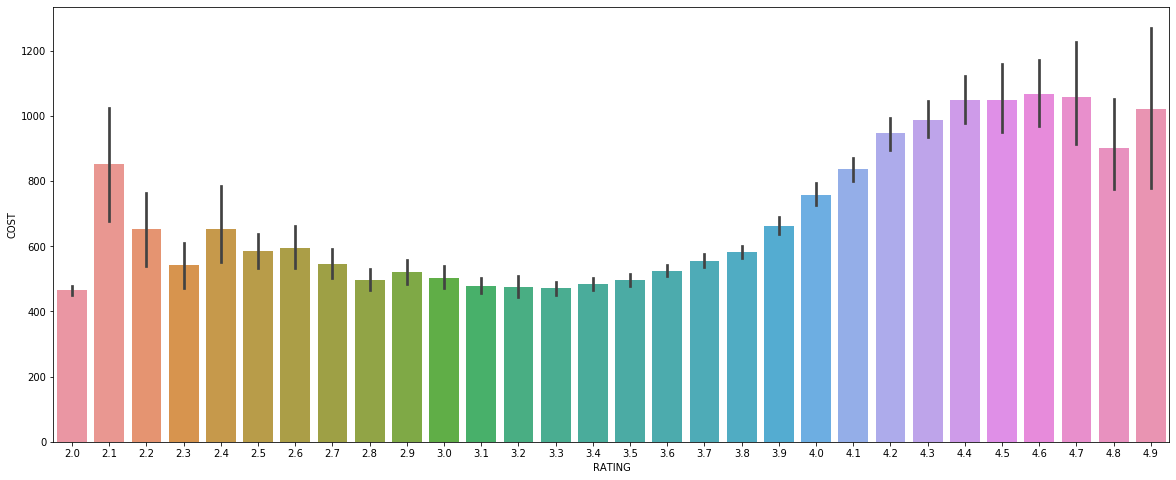

In [30]:
plt.figure(figsize=(20,8))
sb.barplot(x='RATING',y='COST',data=data)

In [31]:
#label encoding

col=['CITY','LOCALITY']
le=LabelEncoder()
data[col]=data[col].apply(lambda x:le.fit_transform(x))
data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",400,328,3.6,1200.00000,49
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),75,1214,4.2,1500.00000,30
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",75,1272,3.8,800.00000,221
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),277,161,4.1,800.00000,24
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),277,709,3.8,300.00000,165
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),316,1184,3.9,655.40079,287
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),42,461,4.3,655.40079,469
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),128,1370,3.7,655.40079,53
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",216,642,2.0,655.40079,0


In [32]:
#changing the data type to int

data['CITY']=data['CITY'].astype(int)
data['LOCALITY']=data['LOCALITY'].astype(int)

In [33]:
#data types of columns

data.dtypes

TITLE             object
RESTAURANT_ID      int64
CUISINES          object
TIME              object
CITY               int32
LOCALITY           int32
RATING           float64
COST             float64
votes              int32
dtype: object

In [34]:
#finding the null value

data.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           4
COST             0
votes            0
dtype: int64

In [35]:
#droping the null valuesfrom the dataset

data1=data.dropna()

In [36]:
# the Correlation between the different variables

data1.corr()

,RESTAURANT_ID,CITY,LOCALITY,RATING,COST,votes
RESTAURANT_ID,1.000000,0.004655,-0.002152,0.035080,0.035820,0.000955
CITY,0.004655,1.000000,0.067217,-0.028677,0.034858,0.033021
LOCALITY,-0.002152,0.067217,1.000000,-0.025551,-0.015948,-0.032438
RATING,0.035080,-0.028677,-0.025551,1.000000,0.258127,0.331719
COST,0.035820,0.034858,-0.015948,0.258127,1.000000,0.223446
votes,0.000955,0.033021,-0.032438,0.331719,0.223446,1.000000


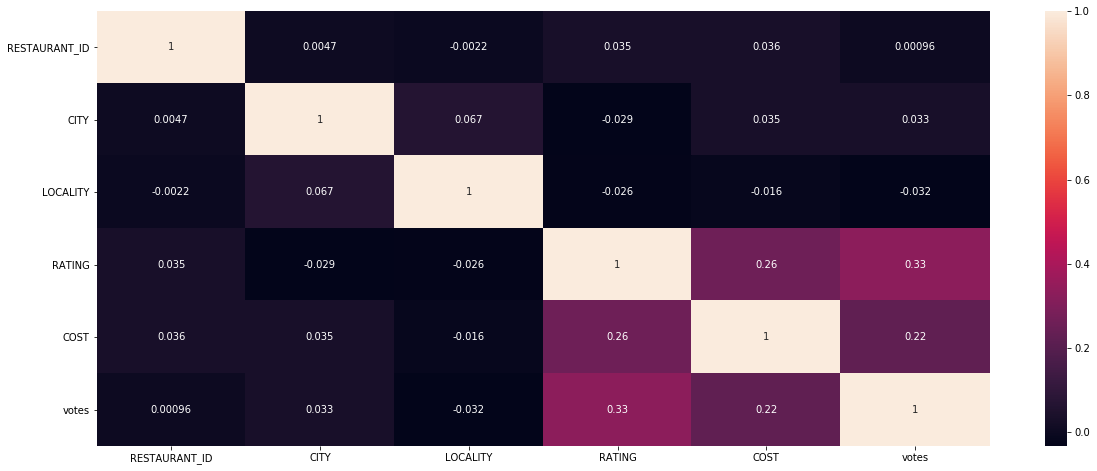

In [37]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(20,8))
sb.heatmap(data1.corr(),annot=True)

# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [38]:
x=data1.drop(['COST','TITLE','RESTAURANT_ID','CUISINES','TIME'],axis=1)
y=data1['COST']

In [39]:
print(x.shape)
print(y.shape)

(16891, 4)
(16891,)


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=100)

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [41]:
#working on RandomForestRegressor 
#training and testing data using RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [42]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on RandomForestRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
print('RMSLE:',np.sqrt(metrics.mean_squared_log_error(y_test, pred)))

MAE : 308.24955901445895
MSE : 276482.290020551
RMSE : 525.8158327975215

RMSLE: 0.620474511533482


Cross Validation and Prediction

In [43]:
#cross valiadtion
score=cross_val_score(rfr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(rfr,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.1309863333901723
STD score: 0.07425447814786557

cross prediction [466.58015792 953.94428425 537.32233952 ... 563.5540079  224.8846073
 643.50801579]


In [44]:
#working on GradientBoostingRegressor 
#training and testing data using GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)

In [45]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on GradientBoostingRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
print('RMSLE:',np.sqrt(metrics.mean_squared_log_error(y_test, pred)))


MAE : 292.47177685050116
MSE : 262770.44744920515
RMSE : 512.6114000382796

RMSLE: 0.6004217318369516


Cross Validation and Prediction

In [46]:
#cross valiadtion
score=cross_val_score(gbr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(gbr,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.15977926273198167
STD score: 0.0810511615406557

cross prediction [515.74787787 853.05042409 631.42192894 ... 493.37450434 386.42309478
 685.18678735]


In [47]:
#working on AdaBoostRegressor 
#training and testing data using AdaBoostRegressor

adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)

In [48]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on AdaBoostRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
print('RMSLE:',np.sqrt(metrics.mean_squared_log_error(y_test, pred)))


MAE : 946.7011265026276
MSE : 1177785.2638408865
RMSE : 1085.2581553901755

RMSLE: 1.1921463511305794


Cross Validation and Prediction

In [49]:
#cross valiadtion
score=cross_val_score(adb,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(adb,x,y,cv=5)
print("cross prediction",predscore)

mean score : -0.6024966807113158
STD score: 0.4961979655532894

cross prediction [ 629.44556014 1248.79771607  641.26251878 ...  745.40171412  814.40342839
  988.43604364]


# Grid Search

GridSearchCV for the best model

In [ ]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print(gridscv)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

# Saving the model with joblib


In [ ]:
# Save the best model with the help of joblib and pickle

joblib.dump(rfr,'doc.pkl')

# Conclusion

Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Exploratory data analysis and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib